In [0]:
from keras.layers import Dense, Dropout, Flatten,BatchNormalization,Activation

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.2759 - acc: 0.9151 - val_loss: 0.0608 - val_acc: 0.9812
Epoch 2/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0948 - acc: 0.9716 - val_loss: 0.0435 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0701 - acc: 0.9790 - val_loss: 0.0389 - val_acc: 0.9868
Epoch 4/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0580 - acc: 0.9825 - val_loss: 0.0352 - val_acc: 0.9886
Epoch 5/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0492 - acc: 0.9854 - val_loss: 0.0302 - val_acc: 0.9894
Epoch 6/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0444 - acc: 0.9871 - val_loss: 0.0290 - val_acc: 0.9907
Epoch 7/12
60000/60000 [========================

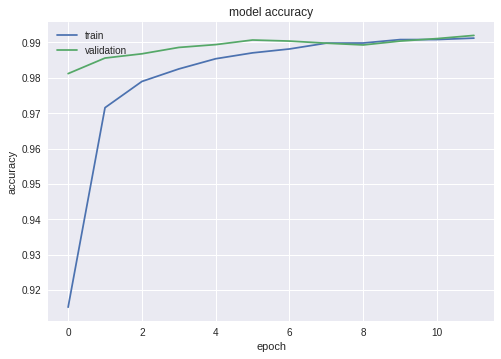

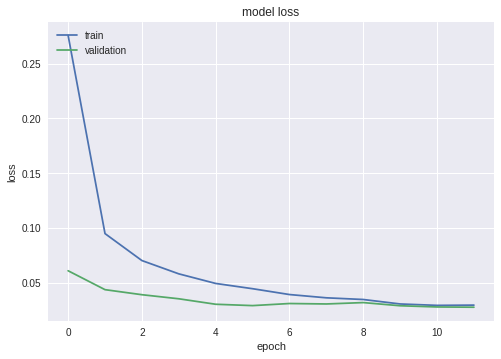

In [10]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
import matplotlib.pyplot as plt

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 40199 samples, validate on 19801 samples
Epoch 1/12
40199/40199 [==============================] - 9s 219us/step - loss: 0.2861 - acc: 0.9115 - val_loss: 0.0688 - val_acc: 0.9783
Epoch 2/12
40199/40199 [==============================] - 7s 186us/step - loss: 0.0881 - acc: 0.9743 - val_loss: 0.0510 - val_acc: 0.9851
Epoch 3/12
40199/40199 [==============================] - 8s 187us/step - loss: 0.0661 - acc: 0.9803 - val_loss: 0.0450 - val_acc: 0.9861
Epoch 4/12
40199/40199 [==============================] - 8s 189us/step - loss: 0.0532 - acc: 0.9840 - val_loss: 0.0407 - val_acc: 0.9883
Epoch 5/12
40199/40199 [==============================] - 8s 187us/step - loss: 0.0440 - acc: 0.9868 - val_loss: 0.0384 - val_acc: 0.9887
Epoch 6/12
40199/40199 [==============================] - 8s 190us/step - loss: 0.0377 - acc: 0.9888 - val_loss: 0.0522 - val_acc: 0.9848
Epoch 7/12
40199/40199 [=========================

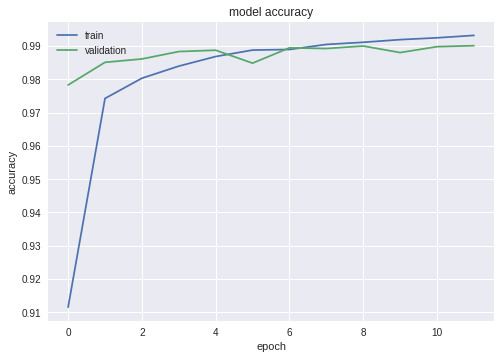

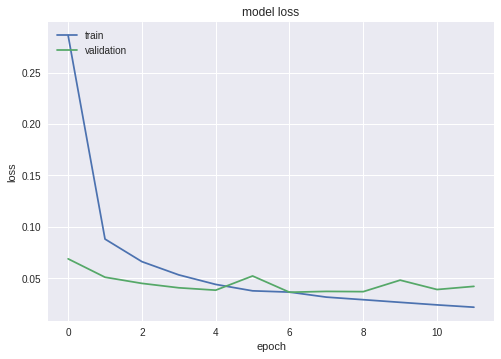

In [5]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.33)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [6]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.2356 - acc: 0.9278 - val_loss: 0.0451 - val_acc: 0.9851
Epoch 2/12
60000/60000 [==============================] - 11s 178us/step - loss: 0.0801 - acc: 0.9759 - val_loss: 0.0360 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.0597 - acc: 0.9824 - val_loss: 0.0372 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.0499 - acc: 0.9851 - val_loss: 0.0314 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.0417 - acc: 0.9877 - val_loss: 0.0293 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.0379 - acc: 0.9887 - val_loss: 0.0305 - val_acc: 0.9902
Epoch 7/12
60000/60000 [===================

In [8]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 10s 206us/step - loss: 0.9669 - acc: 0.6761 - val_loss: 0.1931 - val_acc: 0.9467
Epoch 2/12
48000/48000 [==============================] - 9s 184us/step - loss: 0.3684 - acc: 0.8893 - val_loss: 0.1364 - val_acc: 0.9602
Epoch 3/12
48000/48000 [==============================] - 9s 184us/step - loss: 0.2966 - acc: 0.9133 - val_loss: 0.1073 - val_acc: 0.9695
Epoch 4/12
48000/48000 [==============================] - 9s 183us/step - loss: 0.2488 - acc: 0.9257 - val_loss: 0.0913 - val_acc: 0.9746
Epoch 5/12
48000/48000 [==============================] - 9s 184us/step - loss: 0.2193 - acc: 0.9349 - val_loss: 0.0847 - val_acc: 0.9752
Epoch 6/12
48000/48000 [==============================] - 9s 184us/step - loss: 0.1971 - acc: 0.9421 - val_loss: 0.0724 - val_acc: 0.9793
Epoch 7/12
48000/48000 [==============================] - 9s 184us/step - loss: 0.1839 - acc: 0.9465 - val_loss: 0.0676 -

In [13]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 14s 288us/step - loss: 0.8996 - acc: 0.7040 - val_loss: 0.1475 - val_acc: 0.9573
Epoch 2/12
48000/48000 [==============================] - 12s 259us/step - loss: 0.3541 - acc: 0.8956 - val_loss: 0.1277 - val_acc: 0.9620
Epoch 3/12
48000/48000 [==============================] - 12s 259us/step - loss: 0.2723 - acc: 0.9185 - val_loss: 0.0981 - val_acc: 0.9711
Epoch 4/12
48000/48000 [==============================] - 12s 259us/step - loss: 0.2240 - acc: 0.9344 - val_loss: 0.0853 - val_acc: 0.9745
Epoch 5/12
48000/48000 [==============================] - 12s 259us/step - loss: 0.2014 - acc: 0.9409 - val_loss: 0.0733 - val_acc: 0.9787
Epoch 6/12
48000/48000 [==============================] - 12s 259us/step - loss: 0.1801 - acc: 0.9475 - val_loss: 0.0684 - val_acc: 0.9798
Epoch 7/12
48000/48000 [==============================] - 12s 259us/step - loss: 0.1727 - acc: 0.9499 - val_loss: 0.

In [16]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 15s 306us/step - loss: 1.6301 - acc: 0.4189 - val_loss: 0.5194 - val_acc: 0.8946
Epoch 2/12
48000/48000 [==============================] - 13s 265us/step - loss: 0.8116 - acc: 0.7332 - val_loss: 0.2112 - val_acc: 0.9524
Epoch 3/12
48000/48000 [==============================] - 13s 265us/step - loss: 0.5975 - acc: 0.8131 - val_loss: 0.1721 - val_acc: 0.9577
Epoch 4/12
48000/48000 [==============================] - 13s 265us/step - loss: 0.5033 - acc: 0.8495 - val_loss: 0.1466 - val_acc: 0.9602
Epoch 5/12
48000/48000 [==============================] - 13s 265us/step - loss: 0.4362 - acc: 0.8713 - val_loss: 0.1197 - val_acc: 0.9699
Epoch 6/12
48000/48000 [==============================] - 13s 265us/step - loss: 0.4021 - acc: 0.8816 - val_loss: 0.1102 - val_acc: 0.9714
Epoch 7/12
48000/48000 [==============================] - 13s 264us/step - loss: 0.3701 - acc: 0.8929 - val_loss: 0.

In [19]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["No_Of_CONV2D_Layers", 'Kernal_Size' ,'No_of_Kernal','DropOut','BatchNormalization','DensLayer', 'Test_loss' , "Test_acc"]


x.add_row(["2", (3*3) , [64,32]  , [0.25,0.5]  , 'No',1,0.027 , 0.9923])
x.add_row(["2", (4*4) , [64,32]  , [0.25,0.5]  , 'No',1,0.0291, 0.9924 ])
x.add_row(["2", (5*5) , [64,32] , [0.25,0.5]  , 'NO', 1,0.0310 , 0.9914 ])
x.add_row(["3", (3*3) , [128,64,32] , [0.5,0.4,0.5] ,1,'NO' , 0.059 ,0.9839 ])
x.add_row(["3", (3*3) , [128,64,32] , [0.5,0.4,0.5]  ,1,'Yes', 0.049 ,0.9864 ])
x.add_row(["3", (3*3) , [128,64,32] , [0.5,0.4,0.5] , 2, 'Yes', 0.0817 ,0.9779 ])




print(x)

+---------------------+-------------+---------------+-----------------+--------------------+-----------+-----------+----------+
| No_Of_CONV2D_Layers | Kernal_Size |  No_of_Kernal |     DropOut     | BatchNormalization | DensLayer | Test_loss | Test_acc |
+---------------------+-------------+---------------+-----------------+--------------------+-----------+-----------+----------+
|          2          |      9      |    [64, 32]   |   [0.25, 0.5]   |         No         |     1     |   0.027   |  0.9923  |
|          2          |      16     |    [64, 32]   |   [0.25, 0.5]   |         No         |     1     |   0.0291  |  0.9924  |
|          2          |      25     |    [64, 32]   |   [0.25, 0.5]   |         NO         |     1     |   0.031   |  0.9914  |
|          3          |      9      | [128, 64, 32] | [0.5, 0.4, 0.5] |         1          |     NO    |   0.059   |  0.9839  |
|          3          |      9      | [128, 64, 32] | [0.5, 0.4, 0.5] |         1          |    Yes    |